In [1]:
import tensorflow as tf
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np

In [2]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [3]:
x_train.shape,x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

[6]


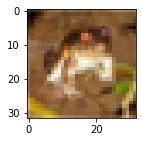

[9]


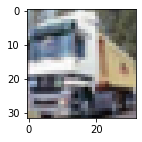

[9]


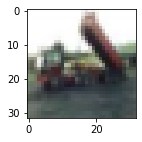

[4]


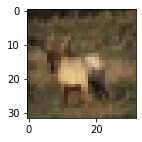

[1]


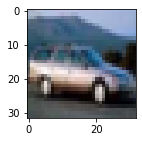

In [4]:
for i in range(5):
  plt.figure(figsize=(2,2))
  img = x_train[i]
  plt.imshow(img)
  print(y_train[i])
  plt.show()


In [5]:
x_train = x_train.reshape(x_train.shape[0],32,32,3)
x_test = x_test.reshape(x_test.shape[0],32,32,3)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [6]:
x_train /= 255
x_test /= 255
n_classes = 10

y_train = np_utils.to_categorical(y_train,n_classes)
y_test = np_utils.to_categorical(y_test,n_classes)

In [7]:
x_train.shape,y_train.shape

((50000, 32, 32, 3), (50000, 10))

In [11]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Conv2D,MaxPool2D,Flatten

model = Sequential()
model.add(Conv2D(50,kernel_size = (3,3),strides = (1,1),padding = 'same',activation = 'relu', input_shape = (32,32,3)))
model.add(Conv2D(75,kernel_size = (3,3),strides = (1,1),padding = 'same',activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(125,kernel_size = (3,3),strides = (1,1),padding = 'same',activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(500,activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(250,activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(10,activation = 'softmax'))

model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

model.fit(x_train,y_train,batch_size=100,epochs=30)

Epoch 1/30
500/500 [==============================] - 9s 15ms/step - loss: 1.8550 - accuracy: 0.3048
Epoch 2/30
500/500 [==============================] - 8s 15ms/step - loss: 1.1274 - accuracy: 0.6020
Epoch 3/30
500/500 [==============================] - 8s 15ms/step - loss: 0.9352 - accuracy: 0.6734
Epoch 4/30
500/500 [==============================] - 8s 15ms/step - loss: 0.8214 - accuracy: 0.7163
Epoch 5/30
500/500 [==============================] - 8s 16ms/step - loss: 0.7191 - accuracy: 0.7499
Epoch 6/30
500/500 [==============================] - 8s 16ms/step - loss: 0.6652 - accuracy: 0.7692
Epoch 7/30
500/500 [==============================] - 8s 16ms/step - loss: 0.6044 - accuracy: 0.7889
Epoch 8/30
500/500 [==============================] - 8s 15ms/step - loss: 0.5628 - accuracy: 0.8014
Epoch 9/30
500/500 [==============================] - 8s 15ms/step - loss: 0.5097 - accuracy: 0.8191
Epoch 10/30
500/500 [==============================] - 8s 15ms/step - loss: 0.4696 - accura

In [12]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.7137 - accuracy: 0.7962


[0.713654100894928, 0.7961999773979187]

In [13]:
classes = range(0,10)

names = ['airplane',
         'automobile',
         'bird',
         'cat',
         'deer',
         'dog',
         'frog',
         'horse',
         'ship',
         'truck'
         ]

In [14]:
class_labels = dict(zip(classes,names))
batch = x_test[100:109]
labels = np.argmax(y_test[100:109],axis=1) 

predictions = model.predict(batch,verbose = 1)

1/1 [==============================] - 1s 507ms/step


In [16]:
for i in predictions:
  print(np.sum(i))

0.99999994
1.0
1.0
0.9999998
1.0
1.0
0.99999994
1.0
0.99999994


In [17]:
class_result = np.argmax(predictions,axis=-1) 
class_result 

array([4, 5, 6, 3, 1, 1, 3, 6, 8])

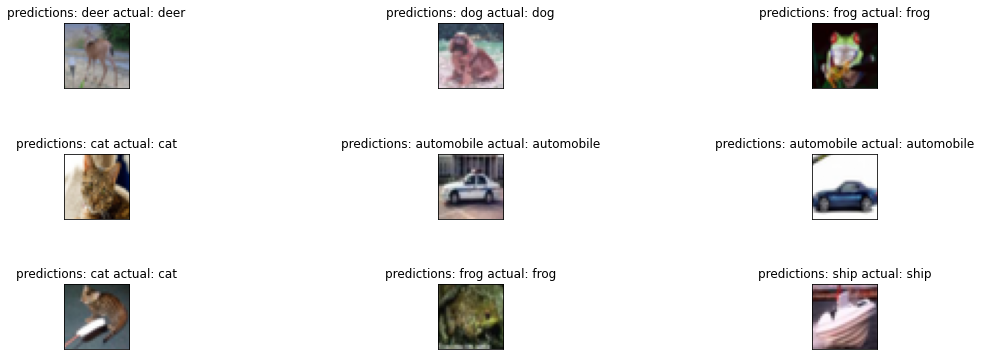

In [19]:
fig ,axs = plt.subplots(3,3,figsize=(19,6))
fig.subplots_adjust(hspace=1)
axs = axs.flatten()

for i,img in enumerate(batch):
  for key,value in class_labels.items():
    if class_result[i] == key:
      title = 'predictions: {} actual: {}'.format(class_labels[key],class_labels[labels[i]])
      axs[i].set_title(title)
      axs[i].axes.get_xaxis().set_visible(False)
      axs[i].axes.get_yaxis().set_visible(False)

  axs[i].imshow(img)

plt.show()